In [1]:
#Import libraries 
import os
import pandas as pd
import numpy as np

from pylab import rcParams
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


In [2]:
#read dataset
df=pd.read_csv("C:/Users/DELL/Desktop/Master_FIEK/Machine Learning/FreeCodeCamp.csv",low_memory=False)

In [3]:
#Top rows of the dataset 
df.head()

,ID,is_software_dev,is_first_dev_job,months_job_search,job_pref,job_intr_fllstck,job_intr_backend,job_intr_frntend,job_intr_mobile,job_intr_devops,...,last_yr_income,communite_time,is_self_employed,has_served_military,is_recv_disab_bnft,has_high_spd_ntnet,time_start,time_end,network_id,time_total_sec
0,64e4170f7f25253d56019818b7e9fdc0,0.0,NaN,NaN,freelance,NaN,NaN,NaN,NaN,NaN,...,70000.0,15 to 29 minutes,0.0,0.0,0.0,1.0,2018-10-24T20:48:37Z,2018-10-24T20:55:53Z,4fc684f97d,436
1,bc030166e4c7f8cb045c28ee98d5a6cd,0.0,NaN,NaN,work for a medium-sized company,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,1.0,2018-10-24T19:55:23Z,2018-10-24T20:05:57Z,f2b0eef42a,634
2,d23d65229c00192bb5a48e73c558a0bb,0.0,NaN,NaN,work for a multinational corporation,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,0.0,0.0,1.0,2018-10-24T19:03:57Z,2018-10-24T19:14:08Z,b1cb01d6fd,611
3,c601014027aa378a84a8e4047cab50e3,0.0,NaN,NaN,freelance,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,0.0,1.0,2018-10-24T18:40:56Z,2018-10-24T18:48:54Z,f7878cd625,478
4,3a461a8244498a13964071d93ab977ea,1.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,9000.0,30 to 44 minutes,0.0,0.0,0.0,1.0,2018-10-24T17:54:59Z,2018-10-24T18:03:42Z,94ae3fc502,523


In [4]:
#check columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28397 entries, 0 to 28396
Data columns (total 80 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     28397 non-null  object 
 1   is_software_dev        28117 non-null  float64
 2   is_first_dev_job       4691 non-null   float64
 3   months_job_search      4611 non-null   float64
 4   job_pref               23408 non-null  object 
 5   job_intr_fllstck       7327 non-null   float64
 6   job_intr_backend       4979 non-null   float64
 7   job_intr_frntend       6385 non-null   float64
 8   job_intr_mobile        4365 non-null   float64
 9   job_intr_devops        1930 non-null   float64
 10  job_intr_datasci       3542 non-null   float64
 11  job_intr_teacher       1626 non-null   float64
 12  job_intr_qa_engn       1147 non-null   float64
 13  job_intr_ux_engn       2733 non-null   float64
 14  job_intr_projm         1593 non-null   float64
 15  jo

In [5]:
pd.set_option('display.max_columns', 150)

In [6]:
#check columns 
df_new = df.iloc[:, 0:9]

In [7]:
#identifying null vallues 
df_new.isnull().sum()

ID                       0
is_software_dev        280
is_first_dev_job     23706
months_job_search    23786
job_pref              4989
job_intr_fllstck     21070
job_intr_backend     23418
job_intr_frntend     22012
job_intr_mobile      24032
dtype: int64

In [8]:
# Print the columns as list
print(list(df.columns))

['ID', 'is_software_dev', 'is_first_dev_job', 'months_job_search', 'job_pref', 'job_intr_fllstck', 'job_intr_backend', 'job_intr_frntend', 'job_intr_mobile', 'job_intr_devops', 'job_intr_datasci', 'job_intr_teacher', 'job_intr_qa_engn', 'job_intr_ux_engn', 'job_intr_projm', 'job_intr_gamedev', 'job_intr_infosec', 'job_intr_dataengn', 'expected_earn', 'job_lctn_pref', 'job_relocate', 'reasons_to_code', 'reasons_to_code_other', 'rsrc_fcc', 'rsrc_mdn', 'rsrc_so', 'rsrc_edx', 'rsrc_coursera', 'rsrc_khan_acdm', 'rsrc_codeacdm', 'rsrc_udacity', 'rsrc_udemy', 'rsrc_frntendmstr', 'rsrc_lynda', 'rsrc_egghead', 'rsrc_css_tricks', 'rsrc_other', 'codeevnt_other', 'yt_codingtuts360', 'yt_codingtrain', 'yt_derekbanas', 'yt_googledevs', 'yt_other', 'hours_learning', 'months_programming', 'bootcamp_attend', 'money_for_learning', 'age', 'gender', 'gender_other', 'country_citizen', 'country_live', 'live_city_population', 'is_ethnic_minority', 'lang_at_home', 'school_degree', 'school_major', 'marital_sta

In [9]:
#check columns 
df_new = df.iloc[:, 9:18]
#identifying null vallues 
df_new.isnull().sum()

job_intr_devops      26467
job_intr_datasci     24855
job_intr_teacher     26771
job_intr_qa_engn     27250
job_intr_ux_engn     25664
job_intr_projm       26804
job_intr_gamedev     24877
job_intr_infosec     25554
job_intr_dataengn    25790
dtype: int64

In [10]:
#remove some of the columns that have high% of missing data 
df=df.drop(['is_first_dev_job', 'months_job_search','job_intr_backend','job_intr_fllstck','job_intr_frntend','job_intr_mobile','job_intr_devops','job_intr_teacher','job_intr_qa_engn','job_intr_projm','job_intr_infosec'], axis = 1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28397 entries, 0 to 28396
Data columns (total 69 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     28397 non-null  object 
 1   is_software_dev        28117 non-null  float64
 2   job_pref               23408 non-null  object 
 3   job_intr_datasci       3542 non-null   float64
 4   job_intr_ux_engn       2733 non-null   float64
 5   job_intr_gamedev       3520 non-null   float64
 6   job_intr_dataengn      2607 non-null   float64
 7   expected_earn          12987 non-null  float64
 8   job_lctn_pref          14005 non-null  object 
 9   job_relocate           10957 non-null  float64
 10  reasons_to_code        13265 non-null  object 
 11  reasons_to_code_other  548 non-null    object 
 12  rsrc_fcc               18042 non-null  float64
 13  rsrc_mdn               7742 non-null   float64
 14  rsrc_so                13449 non-null  float64
 15  rs

In [12]:
#remove some of the columns that have high% of missing data part II
df=df.drop(['reasons_to_code_other', 'gender_other','curr_emplymnt_other','student_debt_amt','rsrc_frntendmstr'], axis = 1)

In [13]:
print(df.shape)

(28397, 64)


In [14]:
#get percentage of missing data
percent_missing = df.apply(lambda x: 1-(x.count()/x.size))


In [15]:
print(percent_missing*100)

ID                     0.000000
is_software_dev        0.986020
job_pref              17.568757
job_intr_datasci      87.526851
job_intr_ux_engn      90.375744
                        ...    
has_high_spd_ntnet     1.743142
time_start             0.000000
time_end               0.000000
network_id             0.000000
time_total_sec         0.000000
Length: 64, dtype: float64


In [16]:
#remove some of the columns that have high% of missing data part III
df=df.drop(['job_intr_datasci', 'job_intr_ux_engn'], axis = 1)

In [17]:
#get percentage of missing data
percent_missing = df.apply(lambda x: 1-(x.count()/x.size))
print(percent_missing*100)

ID                     0.000000
is_software_dev        0.986020
job_pref              17.568757
job_intr_gamedev      87.604324
job_intr_dataengn     90.819453
                        ...    
has_high_spd_ntnet     1.743142
time_start             0.000000
time_end               0.000000
network_id             0.000000
time_total_sec         0.000000
Length: 62, dtype: float64


In [18]:
#remove some of the columns that have high% of missing data part III
df=df.drop(['job_intr_gamedev', 'job_intr_dataengn'], axis = 1)

In [19]:
#get percentage of missing data
percent_missing = df.apply(lambda x: 1-(x.count()/x.size))
print(percent_missing*100)

ID                       0.000000
is_software_dev          0.986020
job_pref                17.568757
expected_earn           54.266296
job_lctn_pref           50.681410
job_relocate            61.414938
reasons_to_code         53.287319
rsrc_fcc                36.465120
rsrc_mdn                72.736557
rsrc_so                 52.639363
rsrc_edx                83.801106
rsrc_coursera           81.311406
rsrc_khan_acdm          81.364229
rsrc_codeacdm           58.826637
rsrc_udacity            82.022749
rsrc_udemy              63.161602
rsrc_lynda              88.956580
rsrc_egghead            96.820087
rsrc_css_tricks         81.895975
rsrc_other              90.949748
codeevnt_other          88.519914
yt_codingtuts360        93.988802
yt_codingtrain          92.488643
yt_derekbanas           92.812621
yt_googledevs           83.889143
yt_other                88.174807
hours_learning           3.845477
months_programming       0.000000
bootcamp_attend          1.031799
money_for_lear

In [20]:
#remove some of the columns that have high% of missing data part III
df=df.drop(['rsrc_edx', 'rsrc_lynda','rsrc_egghead','rsrc_css_tricks','rsrc_other','codeevnt_other','yt_codingtuts360','yt_codingtrain','yt_derekbanas','yt_googledevs', 'yt_other'], axis = 1)

In [21]:
#get percentage of missing data
percent_missing = df.apply(lambda x: 1-(x.count()/x.size))
print(percent_missing*100)

ID                       0.000000
is_software_dev          0.986020
job_pref                17.568757
expected_earn           54.266296
job_lctn_pref           50.681410
job_relocate            61.414938
reasons_to_code         53.287319
rsrc_fcc                36.465120
rsrc_mdn                72.736557
rsrc_so                 52.639363
rsrc_coursera           81.311406
rsrc_khan_acdm          81.364229
rsrc_codeacdm           58.826637
rsrc_udacity            82.022749
rsrc_udemy              63.161602
hours_learning           3.845477
months_programming       0.000000
bootcamp_attend          1.031799
money_for_learning       5.595662
age                      0.000000
gender                   1.081100
country_citizen          2.186851
country_live             1.880480
live_city_population     1.239568
is_ethnic_minority       1.711448
lang_at_home             2.655210
school_degree            1.190267
school_major            29.263655
marital_status           1.563545
has_finance_de

In [22]:
#remove some of the columns that have high% of missing data part III
df=df.drop(['rsrc_coursera', 'rsrc_khan_acdm','rsrc_udacity','rsrc_mdn'], axis = 1)

In [23]:
df.shape

(28397, 45)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28397 entries, 0 to 28396
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    28397 non-null  object 
 1   is_software_dev       28117 non-null  float64
 2   job_pref              23408 non-null  object 
 3   expected_earn         12987 non-null  float64
 4   job_lctn_pref         14005 non-null  object 
 5   job_relocate          10957 non-null  float64
 6   reasons_to_code       13265 non-null  object 
 7   rsrc_fcc              18042 non-null  float64
 8   rsrc_so               13449 non-null  float64
 9   rsrc_codeacdm         11692 non-null  float64
 10  rsrc_udemy            10461 non-null  float64
 11  hours_learning        27305 non-null  float64
 12  months_programming    28397 non-null  int64  
 13  bootcamp_attend       28104 non-null  float64
 14  money_for_learning    26808 non-null  float64
 15  age                

In [25]:
#get percentage of missing data
percent_missing = df.apply(lambda x: 1-(x.count()/x.size))
print(percent_missing*100)

ID                       0.000000
is_software_dev          0.986020
job_pref                17.568757
expected_earn           54.266296
job_lctn_pref           50.681410
job_relocate            61.414938
reasons_to_code         53.287319
rsrc_fcc                36.465120
rsrc_so                 52.639363
rsrc_codeacdm           58.826637
rsrc_udemy              63.161602
hours_learning           3.845477
months_programming       0.000000
bootcamp_attend          1.031799
money_for_learning       5.595662
age                      0.000000
gender                   1.081100
country_citizen          2.186851
country_live             1.880480
live_city_population     1.239568
is_ethnic_minority       1.711448
lang_at_home             2.655210
school_degree            1.190267
school_major            29.263655
marital_status           1.563545
has_finance_depends      1.616368
has_children            71.546290
num_children            88.541043
do_finance_support      71.683629
debt_amt      

In [26]:
#remove some of the columns that have high% of missing data part III
df=df.drop(['job_relocate', 'rsrc_udemy','has_children','num_children','do_finance_support', 'home_mrtg_owe','student_debt_has'], axis = 1)

In [27]:
df.shape

(28397, 38)

In [28]:
df.head()

,ID,is_software_dev,job_pref,expected_earn,job_lctn_pref,reasons_to_code,rsrc_fcc,rsrc_so,rsrc_codeacdm,hours_learning,months_programming,bootcamp_attend,money_for_learning,age,gender,country_citizen,country_live,live_city_population,is_ethnic_minority,lang_at_home,school_degree,school_major,marital_status,has_finance_depends,debt_amt,home_mrtg_has,curr_emplymnt,curr_field,last_yr_income,communite_time,is_self_employed,has_served_military,is_recv_disab_bnft,has_high_spd_ntnet,time_start,time_end,network_id,time_total_sec
0,64e4170f7f25253d56019818b7e9fdc0,0.0,freelance,NaN,NaN,NaN,1.0,NaN,NaN,4.0,8,0.0,500.0,45,Female,United States of America,United States of America,"between 100,000 and 1 million",1.0,English,bachelor's degree,Management Information Systems,married or domestic partnership,1.0,0.0,NaN,Employed for wages,finance,70000.0,15 to 29 minutes,0.0,0.0,0.0,1.0,2018-10-24T20:48:37Z,2018-10-24T20:55:53Z,4fc684f97d,436
1,bc030166e4c7f8cb045c28ee98d5a6cd,0.0,work for a medium-sized company,45000.0,in an office with other developers,To change careers,NaN,1.0,NaN,30.0,7,0.0,150.0,34,Female,Germany,Germany,more than 1 million,0.0,German,master's degree (non-professional),Environmental Science,married or domestic partnership,1.0,0.0,NaN,Not working but looking for work,NaN,NaN,NaN,NaN,0.0,0.0,1.0,2018-10-24T19:55:23Z,2018-10-24T20:05:57Z,f2b0eef42a,634
2,d23d65229c00192bb5a48e73c558a0bb,0.0,work for a multinational corporation,70000.0,in an office with other developers,As a hobby,1.0,1.0,1.0,12.0,4,0.0,100.0,24,Male,Nigeria,Nigeria,more than 1 million,0.0,English,associate's degree,Civil Engineering,"single, never married",0.0,0.0,NaN,Not working but looking for work,NaN,NaN,NaN,NaN,0.0,0.0,1.0,2018-10-24T19:03:57Z,2018-10-24T19:14:08Z,b1cb01d6fd,611
3,c601014027aa378a84a8e4047cab50e3,0.0,freelance,NaN,NaN,NaN,1.0,1.0,1.0,30.0,14,0.0,200.0,38,Male,Serbia,Serbia,"between 100,000 and 1 million",0.0,Serbian,"some college credit, no degree",Electrical and Electronics Engineering,married or domestic partnership,1.0,0.0,NaN,A stay-at-home parent or homemaker,NaN,NaN,NaN,NaN,1.0,0.0,1.0,2018-10-24T18:40:56Z,2018-10-24T18:48:54Z,f7878cd625,478
4,3a461a8244498a13964071d93ab977ea,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,20.0,18,0.0,250.0,36,Male,Bosnia & Herzegovina,Bosnia & Herzegovina,"between 100,000 and 1 million",0.0,Serbian,"some college credit, no degree",Electrical Engineering,married or domestic partnership,1.0,0.0,NaN,Employed for wages,software development and IT,9000.0,30 to 44 minutes,0.0,0.0,0.0,1.0,2018-10-24T17:54:59Z,2018-10-24T18:03:42Z,94ae3fc502,523


In [29]:
#drop columns that don't represent useful information for our project
df=df.drop(['time_start', 'time_end','network_id','time_total_sec','communite_time'], axis = 1)

In [30]:
df.shape

(28397, 33)

In [31]:
#get unique values for filed texts to check if needed to standardize data
df.job_pref.unique()


array(['freelance', 'work for a medium-sized company',
       'work for a multinational corporation', nan,
       'start your own business', 'work for a startup',
       'work for a nonprofit', 'work for a government'], dtype=object)

In [32]:
df.reasons_to_code.unique()

array([nan, 'To change careers', 'As a hobby',
       'To succeed in current career', 'To create art or entertainment',
       'To start a business or to freelance',
       'To meet school requirements', 'choice 7',
       'To be more successful in my current career',
       'To start a business', 'Career change'], dtype=object)

In [33]:
df.job_lctn_pref.unique()

array([nan, 'in an office with other developers', 'no preference',
       'from home'], dtype=object)

In [34]:
######################### Data standardization for implementing algorithms ##################################################################

In [35]:
df2 = df


In [36]:
from sklearn.preprocessing import LabelEncoder

In [38]:
encoder = LabelEncoder()
df2['job_pref_standardize'] = encoder.fit_transform(df2['job_pref'])

In [39]:
df2.head()

,ID,is_software_dev,job_pref,expected_earn,job_lctn_pref,reasons_to_code,rsrc_fcc,rsrc_so,rsrc_codeacdm,hours_learning,months_programming,bootcamp_attend,money_for_learning,age,gender,country_citizen,country_live,live_city_population,is_ethnic_minority,lang_at_home,school_degree,school_major,marital_status,has_finance_depends,debt_amt,home_mrtg_has,curr_emplymnt,curr_field,last_yr_income,is_self_employed,has_served_military,is_recv_disab_bnft,has_high_spd_ntnet,job_pref_standardize
0,64e4170f7f25253d56019818b7e9fdc0,0.0,freelance,NaN,NaN,NaN,1.0,NaN,NaN,4.0,8,0.0,500.0,45,Female,United States of America,United States of America,"between 100,000 and 1 million",1.0,English,bachelor's degree,Management Information Systems,married or domestic partnership,1.0,0.0,NaN,Employed for wages,finance,70000.0,0.0,0.0,0.0,1.0,0
1,bc030166e4c7f8cb045c28ee98d5a6cd,0.0,work for a medium-sized company,45000.0,in an office with other developers,To change careers,NaN,1.0,NaN,30.0,7,0.0,150.0,34,Female,Germany,Germany,more than 1 million,0.0,German,master's degree (non-professional),Environmental Science,married or domestic partnership,1.0,0.0,NaN,Not working but looking for work,NaN,NaN,NaN,0.0,0.0,1.0,3
2,d23d65229c00192bb5a48e73c558a0bb,0.0,work for a multinational corporation,70000.0,in an office with other developers,As a hobby,1.0,1.0,1.0,12.0,4,0.0,100.0,24,Male,Nigeria,Nigeria,more than 1 million,0.0,English,associate's degree,Civil Engineering,"single, never married",0.0,0.0,NaN,Not working but looking for work,NaN,NaN,NaN,0.0,0.0,1.0,4
3,c601014027aa378a84a8e4047cab50e3,0.0,freelance,NaN,NaN,NaN,1.0,1.0,1.0,30.0,14,0.0,200.0,38,Male,Serbia,Serbia,"between 100,000 and 1 million",0.0,Serbian,"some college credit, no degree",Electrical and Electronics Engineering,married or domestic partnership,1.0,0.0,NaN,A stay-at-home parent or homemaker,NaN,NaN,NaN,1.0,0.0,1.0,0
4,3a461a8244498a13964071d93ab977ea,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,20.0,18,0.0,250.0,36,Male,Bosnia & Herzegovina,Bosnia & Herzegovina,"between 100,000 and 1 million",0.0,Serbian,"some college credit, no degree",Electrical Engineering,married or domestic partnership,1.0,0.0,NaN,Employed for wages,software development and IT,9000.0,0.0,0.0,0.0,1.0,7


In [40]:
df2['reasons_to_code_standardized'] = encoder.fit_transform(df2['reasons_to_code'])

In [44]:
df2['job_lctn_pref_standardized'] = encoder.fit_transform(df2['job_lctn_pref'])
df2['gender_standardized'] = encoder.fit_transform(df2['gender'])
df2['live_city_population_standardized'] = encoder.fit_transform(df2['live_city_population'])
df2['school_degree_standardized'] = encoder.fit_transform(df2['school_degree'])
df2['school_major_standardized'] = encoder.fit_transform(df2['school_major'])
df2['marital_status_standardized'] = encoder.fit_transform(df2['marital_status'])
df2['curr_emplymnt_standardized'] = encoder.fit_transform(df2['curr_emplymnt'])
df2['curr_field_standardized'] = encoder.fit_transform(df2['curr_field'])

In [45]:
df2.head()

,ID,is_software_dev,job_pref,expected_earn,job_lctn_pref,reasons_to_code,rsrc_fcc,rsrc_so,rsrc_codeacdm,hours_learning,months_programming,bootcamp_attend,money_for_learning,age,gender,country_citizen,country_live,live_city_population,is_ethnic_minority,lang_at_home,school_degree,school_major,marital_status,has_finance_depends,debt_amt,home_mrtg_has,curr_emplymnt,curr_field,last_yr_income,is_self_employed,has_served_military,is_recv_disab_bnft,has_high_spd_ntnet,job_pref_standardize,reasons_to_code_standardized,job_lctn_pref_standardized,gender_standardized,live_city_population_standardized,school_degree_standardized,school_major_standardized,marital_status_standardized,curr_emplymnt_standardized,curr_field_standardized
0,64e4170f7f25253d56019818b7e9fdc0,0.0,freelance,NaN,NaN,NaN,1.0,NaN,NaN,4.0,8,0.0,500.0,45,Female,United States of America,United States of America,"between 100,000 and 1 million",1.0,English,bachelor's degree,Management Information Systems,married or domestic partnership,1.0,0.0,NaN,Employed for wages,finance,70000.0,0.0,0.0,0.0,1.0,0,10,3,0,0,2,366,1,2,5
1,bc030166e4c7f8cb045c28ee98d5a6cd,0.0,work for a medium-sized company,45000.0,in an office with other developers,To change careers,NaN,1.0,NaN,30.0,7,0.0,150.0,34,Female,Germany,Germany,more than 1 million,0.0,German,master's degree (non-professional),Environmental Science,married or domestic partnership,1.0,0.0,NaN,Not working but looking for work,NaN,NaN,NaN,0.0,0.0,1.0,3,3,1,0,2,4,229,1,5,14
2,d23d65229c00192bb5a48e73c558a0bb,0.0,work for a multinational corporation,70000.0,in an office with other developers,As a hobby,1.0,1.0,1.0,12.0,4,0.0,100.0,24,Male,Nigeria,Nigeria,more than 1 million,0.0,English,associate's degree,Civil Engineering,"single, never married",0.0,0.0,NaN,Not working but looking for work,NaN,NaN,NaN,0.0,0.0,1.0,4,0,1,1,2,1,118,3,5,14
3,c601014027aa378a84a8e4047cab50e3,0.0,freelance,NaN,NaN,NaN,1.0,1.0,1.0,30.0,14,0.0,200.0,38,Male,Serbia,Serbia,"between 100,000 and 1 million",0.0,Serbian,"some college credit, no degree",Electrical and Electronics Engineering,married or domestic partnership,1.0,0.0,NaN,A stay-at-home parent or homemaker,NaN,NaN,NaN,1.0,0.0,1.0,0,10,3,1,0,7,206,1,0,14
4,3a461a8244498a13964071d93ab977ea,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,20.0,18,0.0,250.0,36,Male,Bosnia & Herzegovina,Bosnia & Herzegovina,"between 100,000 and 1 million",0.0,Serbian,"some college credit, no degree",Electrical Engineering,married or domestic partnership,1.0,0.0,NaN,Employed for wages,software development and IT,9000.0,0.0,0.0,0.0,1.0,7,10,3,1,0,7,204,1,2,12


In [46]:
df3 = df2

In [49]:
#drop columns that are categorical data in order to only use the standardized ones 
df3=df3.drop(['job_pref', 'reasons_to_code','gender','live_city_population','school_degree','school_major','marital_status','curr_emplymnt','curr_field'], axis = 1)

In [50]:
df3.head()

,ID,is_software_dev,expected_earn,job_lctn_pref,rsrc_fcc,rsrc_so,rsrc_codeacdm,hours_learning,months_programming,bootcamp_attend,money_for_learning,age,country_citizen,country_live,is_ethnic_minority,lang_at_home,has_finance_depends,debt_amt,home_mrtg_has,last_yr_income,is_self_employed,has_served_military,is_recv_disab_bnft,has_high_spd_ntnet,job_pref_standardize,reasons_to_code_standardized,job_lctn_pref_standardized,gender_standardized,live_city_population_standardized,school_degree_standardized,school_major_standardized,marital_status_standardized,curr_emplymnt_standardized,curr_field_standardized
0,64e4170f7f25253d56019818b7e9fdc0,0.0,NaN,NaN,1.0,NaN,NaN,4.0,8,0.0,500.0,45,United States of America,United States of America,1.0,English,1.0,0.0,NaN,70000.0,0.0,0.0,0.0,1.0,0,10,3,0,0,2,366,1,2,5
1,bc030166e4c7f8cb045c28ee98d5a6cd,0.0,45000.0,in an office with other developers,NaN,1.0,NaN,30.0,7,0.0,150.0,34,Germany,Germany,0.0,German,1.0,0.0,NaN,NaN,NaN,0.0,0.0,1.0,3,3,1,0,2,4,229,1,5,14
2,d23d65229c00192bb5a48e73c558a0bb,0.0,70000.0,in an office with other developers,1.0,1.0,1.0,12.0,4,0.0,100.0,24,Nigeria,Nigeria,0.0,English,0.0,0.0,NaN,NaN,NaN,0.0,0.0,1.0,4,0,1,1,2,1,118,3,5,14
3,c601014027aa378a84a8e4047cab50e3,0.0,NaN,NaN,1.0,1.0,1.0,30.0,14,0.0,200.0,38,Serbia,Serbia,0.0,Serbian,1.0,0.0,NaN,NaN,NaN,1.0,0.0,1.0,0,10,3,1,0,7,206,1,0,14
4,3a461a8244498a13964071d93ab977ea,1.0,NaN,NaN,1.0,1.0,1.0,20.0,18,0.0,250.0,36,Bosnia & Herzegovina,Bosnia & Herzegovina,0.0,Serbian,1.0,0.0,NaN,9000.0,0.0,0.0,0.0,1.0,7,10,3,1,0,7,204,1,2,12


In [51]:
df3=df3.drop(['job_lctn_pref'], axis = 1)

In [52]:
###################################Some more preprocessing to fit the K-Means algorithm#######################################

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [57]:
df3.head()

,ID,is_software_dev,expected_earn,rsrc_fcc,rsrc_so,rsrc_codeacdm,hours_learning,months_programming,bootcamp_attend,money_for_learning,age,country_citizen,country_live,is_ethnic_minority,lang_at_home,has_finance_depends,debt_amt,home_mrtg_has,last_yr_income,is_self_employed,has_served_military,is_recv_disab_bnft,has_high_spd_ntnet,job_pref_standardize,reasons_to_code_standardized,job_lctn_pref_standardized,gender_standardized,live_city_population_standardized,school_degree_standardized,school_major_standardized,marital_status_standardized,curr_emplymnt_standardized,curr_field_standardized
0,64e4170f7f25253d56019818b7e9fdc0,0.0,NaN,1.0,NaN,NaN,4.0,8,0.0,500.0,45,United States of America,United States of America,1.0,English,1.0,0.0,NaN,70000.0,0.0,0.0,0.0,1.0,0,10,3,0,0,2,366,1,2,5
1,bc030166e4c7f8cb045c28ee98d5a6cd,0.0,45000.0,NaN,1.0,NaN,30.0,7,0.0,150.0,34,Germany,Germany,0.0,German,1.0,0.0,NaN,NaN,NaN,0.0,0.0,1.0,3,3,1,0,2,4,229,1,5,14
2,d23d65229c00192bb5a48e73c558a0bb,0.0,70000.0,1.0,1.0,1.0,12.0,4,0.0,100.0,24,Nigeria,Nigeria,0.0,English,0.0,0.0,NaN,NaN,NaN,0.0,0.0,1.0,4,0,1,1,2,1,118,3,5,14
3,c601014027aa378a84a8e4047cab50e3,0.0,NaN,1.0,1.0,1.0,30.0,14,0.0,200.0,38,Serbia,Serbia,0.0,Serbian,1.0,0.0,NaN,NaN,NaN,1.0,0.0,1.0,0,10,3,1,0,7,206,1,0,14
4,3a461a8244498a13964071d93ab977ea,1.0,NaN,1.0,1.0,1.0,20.0,18,0.0,250.0,36,Bosnia & Herzegovina,Bosnia & Herzegovina,0.0,Serbian,1.0,0.0,NaN,9000.0,0.0,0.0,0.0,1.0,7,10,3,1,0,7,204,1,2,12


In [58]:
df3['country_citizen_standardized'] = encoder.fit_transform(df3['country_citizen'])
df3['country_live_standardized'] = encoder.fit_transform(df3['country_live'])
df3['lang_at_home_standardized'] = encoder.fit_transform(df3['lang_at_home'])

In [59]:
df3=df3.drop(['country_citizen', 'country_live','lang_at_home'], axis = 1)

In [62]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28397 entries, 0 to 28396
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 28397 non-null  object 
 1   is_software_dev                    28117 non-null  float64
 2   expected_earn                      12987 non-null  float64
 3   rsrc_fcc                           18042 non-null  float64
 4   rsrc_so                            13449 non-null  float64
 5   rsrc_codeacdm                      11692 non-null  float64
 6   hours_learning                     27305 non-null  float64
 7   months_programming                 28397 non-null  int64  
 8   bootcamp_attend                    28104 non-null  float64
 9   money_for_learning                 26808 non-null  float64
 10  age                                28397 non-null  int64  
 11  is_ethnic_minority                 27911 non-null  flo

In [63]:
df3['ID_standardized'] = encoder.fit_transform(df3['ID'])

In [64]:
df3=df3.drop(['ID'], axis = 1)

In [ ]:
#############################################Implementing K-Means with Elbow and silhouette#######################################

In [66]:
# check for missing values
print(df3.isnull().sum())

is_software_dev                        280
expected_earn                        15410
rsrc_fcc                             10355
rsrc_so                              14948
rsrc_codeacdm                        16705
hours_learning                        1092
months_programming                       0
bootcamp_attend                        293
money_for_learning                    1589
age                                      0
is_ethnic_minority                     486
has_finance_depends                    459
debt_amt                               522
home_mrtg_has                        17045
last_yr_income                       14090
is_self_employed                     12294
has_served_military                    709
is_recv_disab_bnft                     793
has_high_spd_ntnet                     495
job_pref_standardize                     0
reasons_to_code_standardized             0
job_lctn_pref_standardized               0
gender_standardized                      0
live_city_p

In [84]:
df4.shape

(28397, 33)

In [67]:
# impute missing values with mean
df3 = df3.fillna(df3.mean())

In [68]:
print(df3.isnull().sum())

is_software_dev                      0
expected_earn                        0
rsrc_fcc                             0
rsrc_so                              0
rsrc_codeacdm                        0
hours_learning                       0
months_programming                   0
bootcamp_attend                      0
money_for_learning                   0
age                                  0
is_ethnic_minority                   0
has_finance_depends                  0
debt_amt                             0
home_mrtg_has                        0
last_yr_income                       0
is_self_employed                     0
has_served_military                  0
is_recv_disab_bnft                   0
has_high_spd_ntnet                   0
job_pref_standardize                 0
reasons_to_code_standardized         0
job_lctn_pref_standardized           0
gender_standardized                  0
live_city_population_standardized    0
school_degree_standardized           0
school_major_standardized

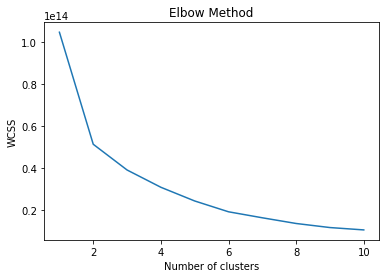

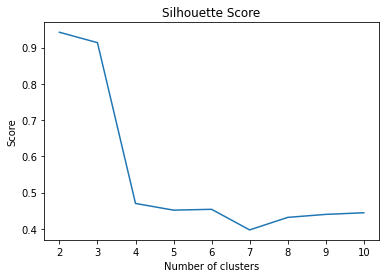

In [69]:
# Fit k-means model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df3)

# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette score
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df3)
    silhouette_avg = silhouette_score(df3, cluster_labels)
    silhouette_scores.append(silhouette_avg)
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

# Get cluster labels and centroids
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [72]:
df4 = np.array(df3)

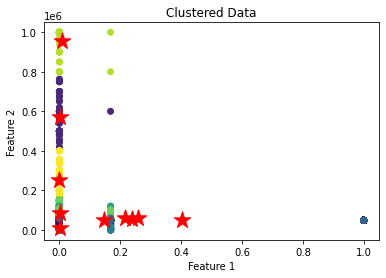

In [73]:
plt.scatter(df4[:, 0], df4[:, 1], c=cluster_labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r')
plt.title('Clustered Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [74]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Calinski-Harabasz index
ch_score = calinski_harabasz_score(df4, cluster_labels)

# Davies-Bouldin index
db_score = davies_bouldin_score(df4, cluster_labels)

print(f'Calinski-Harabasz index: {ch_score}')
print(f'Davies-Bouldin index: {db_score}')

Calinski-Harabasz index: 28049.961921567032
Davies-Bouldin index: 0.6444836088691103


In [76]:
# Group data by cluster labels
clustered_data = df3.groupby(cluster_labels)

# Calculate summary statistics for each cluster
cluster_means = clustered_data.mean()
cluster_medians = clustered_data.median()
cluster_sizes = clustered_data.size()

In [77]:
# Get data points in cluster 0
cluster_0_data = df3[cluster_labels == 0]

# Get data points in cluster 1
cluster_1_data = df3[cluster_labels == 1]

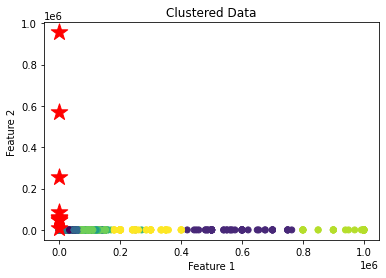

In [102]:
plt.scatter(df4[:, 1],df4[:, 0], c=cluster_labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r')
plt.title('Clustered Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [94]:
################################Implement K-means using standard scalar to data####################################

In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
scaler = StandardScaler()

In [106]:
df5 = scaler.fit_transform(df3)

In [108]:
df5 = pd.DataFrame(df5)

In [109]:
df5.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
count,2.839700e+04,2.839700e+04,28397.0,28397.0,28397.0,2.839700e+04,2.839700e+04,2.839700e+04,2.839700e+04,2.839700e+04,2.839700e+04,2.839700e+04,2.839700e+04,2.839700e+04,2.839700e+04,2.839700e+04,2.839700e+04,2.839700e+04,2.839700e+04,2.839700e+04,2.839700e+04,2.839700e+04,2.839700e+04,2.839700e+04,2.839700e+04,2.839700e+04,2.839700e+04,2.839700e+04,2.839700e+04,2.839700e+04,2.839700e+04,2.839700e+04,2.839700e+04
mean,1.025376e-15,2.057453e-17,0.0,0.0,0.0,-2.572471e-16,1.241036e-15,-1.181257e-15,5.662442e-17,-4.604042e-16,-7.310379e-16,3.187459e-16,-2.537464e-15,1.625163e-16,-2.194994e-16,2.348917e-17,9.319939e-16,1.158683e-16,-5.603997e-15,-1.301366e-16,1.317904e-15,4.956340e-16,-1.286321e-14,-4.803942e-16,-5.394583e-16,6.227289e-16,-6.883649e-15,-4.254480e-17,6.502411e-16,6.465308e-16,1.029270e-15,-1.293945e-15,1.483321e-17
std,1.000018e+00,1.000018e+00,0.0,0.0,0.0,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00
min,-4.516676e-01,-9.514326e-01,0.0,0.0,0.0,-9.801487e-01,-4.666459e-01,-2.242146e-01,-1.658627e-01,-2.434655e+00,-5.724645e-01,-6.460095e-01,-8.410886e-01,-9.825255e-01,-9.303870e-01,-1.284224e+00,-2.911680e-01,-1.749990e-01,-2.318426e+00,-1.363949e+00,-2.145174e+00,-1.926144e+00,-1.756025e+00,-1.242192e+00,-1.641010e+00,-1.684687e+00,-2.286488e+00,-1.531984e+00,-2.801826e+00,-2.217926e+00,-2.241231e+00,-1.628755e+00,-1.731990e+00
25%,-4.516676e-01,0.000000e+00,0.0,0.0,0.0,-6.333201e-01,-4.375082e-01,-2.242146e-01,-1.658627e-01,-6.484460e-01,-5.724645e-01,-6.460095e-01,-8.410886e-01,-9.825255e-01,-3.045700e-01,-1.284224e+00,-2.911680e-01,-1.749990e-01,4.389791e-01,-9.620557e-01,-1.265175e+00,-9.935807e-01,3.524672e-01,-1.242192e+00,-8.517790e-01,-9.681966e-01,-1.319529e+00,-8.042409e-01,-3.666614e-02,-7.828482e-01,-8.245734e-01,-7.453969e-01,-8.659949e-01
50%,-4.516676e-01,0.000000e+00,0.0,0.0,0.0,-2.864915e-01,-2.918199e-01,-2.242146e-01,-1.634433e-01,-2.281616e-01,-5.724645e-01,-6.460095e-01,-8.410886e-01,0.000000e+00,-1.138355e-16,0.000000e+00,-2.911680e-01,-1.749990e-01,4.389791e-01,-1.582693e-01,7.881582e-01,8.715465e-01,3.524672e-01,-1.240341e-01,-4.571633e-01,-9.957491e-02,6.143907e-01,-7.649796e-02,2.147120e-01,2.147057e-01,2.977134e-01,-5.533627e-01,0.000000e+00
75%,-4.516676e-01,0.000000e+00,0.0,0.0,0.0,4.071657e-01,5.783206e-02,-2.242146e-01,-1.053769e-01,5.073361e-01,6.521767e-17,1.573397e+00,1.211200e+00,0.000000e+00,-1.138355e-16,1.373172e+00,-2.911680e-01,-1.749990e-01,4.389791e-01,1.047410e+00,7.881582e-01,8.715465e-01,3.524672e-01,9.941235e-01,1.121299e+00,1.249979e+00,6.143907e-01,2.873735e-01,7.174683e-01,9.672462e-01,9.416485e-01,9.253014e-01,8.659949e-01
max,2.236065e+00,1.875325e+01,0.0,0.0,0.0,1.067329e+01,1.701595e+01,4.506511e+00,5.064221e+01,7.652171e+00,1.777250e+00,1.573397e+00,1.211200e+00,2.545987e+00,3.036043e+01,1.373172e+00,3.522389e+00,5.878476e+00,4.389791e-01,1.449304e+00,7.881582e-01,8.715465e-01,4.569451e+00,2.112281e+00,2.305146e+00,1.249979e+00,2.548310e+00,2.106731e+00,7.174683e-01,1.159757e+00,1.144028e+00,2.154321e+00,1.731990e+00


In [110]:
print(df3.isnull().sum())

is_software_dev                      0
expected_earn                        0
rsrc_fcc                             0
rsrc_so                              0
rsrc_codeacdm                        0
hours_learning                       0
months_programming                   0
bootcamp_attend                      0
money_for_learning                   0
age                                  0
is_ethnic_minority                   0
has_finance_depends                  0
debt_amt                             0
home_mrtg_has                        0
last_yr_income                       0
is_self_employed                     0
has_served_military                  0
is_recv_disab_bnft                   0
has_high_spd_ntnet                   0
job_pref_standardize                 0
reasons_to_code_standardized         0
job_lctn_pref_standardized           0
gender_standardized                  0
live_city_population_standardized    0
school_degree_standardized           0
school_major_standardized

In [111]:
df5 = df3

In [112]:
df5.describe()

,is_software_dev,expected_earn,rsrc_fcc,rsrc_so,rsrc_codeacdm,hours_learning,months_programming,bootcamp_attend,money_for_learning,age,is_ethnic_minority,has_finance_depends,debt_amt,home_mrtg_has,last_yr_income,is_self_employed,has_served_military,is_recv_disab_bnft,has_high_spd_ntnet,job_pref_standardize,reasons_to_code_standardized,job_lctn_pref_standardized,gender_standardized,live_city_population_standardized,school_degree_standardized,school_major_standardized,marital_status_standardized,curr_emplymnt_standardized,curr_field_standardized,country_citizen_standardized,country_live_standardized,lang_at_home_standardized,ID_standardized
count,28397.000000,28397.000000,28397.0,28397.0,28397.0,28397.000000,28397.000000,28397.000000,28397.000000,28397.000000,28397.000000,28397.000000,28397.000000,28397.000000,28397.000000,28397.000000,28397.000000,28397.000000,28397.000000,28397.000000,28397.000000,28397.000000,28397.000000,28397.000000,28397.000000,28397.000000,28397.000000,28397.000000,28397.000000,28397.000000,28397.000000,28397.000000,28397.000000
mean,0.168048,48284.581505,1.0,1.0,1.0,14.130159,16.015213,0.047395,685.544017,28.171497,0.243632,0.291073,0.409830,0.278453,29733.516530,0.483264,0.076351,0.028909,0.840800,3.393809,7.313096,2.065429,0.832834,1.110927,4.158503,343.290488,2.364616,4.210233,11.145860,126.731767,121.818291,84.815826,14198.000000
std,0.372067,50750.240960,0.0,0.0,0.0,14.416597,34.320446,0.211388,4133.274104,9.517532,0.425591,0.450579,0.487269,0.283410,31958.785823,0.376315,0.262227,0.165197,0.362666,2.488267,3.409152,1.072332,0.474281,0.894344,2.534156,203.774685,1.034188,2.748272,3.978141,57.140781,54.354264,52.074951,8197.652133
min,0.000000,0.000000,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,48284.581505,1.0,1.0,1.0,5.000000,1.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,20000.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,1.000000,1.000000,0.000000,2.000000,146.000000,1.000000,2.000000,11.000000,82.000000,77.000000,46.000000,7099.000000
50%,0.000000,48284.581505,1.0,1.0,1.0,10.000000,6.000000,0.000000,10.000000,26.000000,0.000000,0.000000,0.000000,0.278453,29733.516530,0.483264,0.000000,0.000000,1.000000,3.000000,10.000000,3.000000,1.000000,1.000000,3.000000,323.000000,3.000000,4.000000,12.000000,139.000000,138.000000,56.000000,14198.000000
75%,0.000000,48284.581505,1.0,1.0,1.0,20.000000,18.000000,0.000000,250.000000,33.000000,0.243632,1.000000,1.000000,0.278453,29733.516530,1.000000,0.000000,0.000000,1.000000,6.000000,10.000000,3.000000,1.000000,2.000000,7.000000,598.000000,3.000000,5.000000,14.000000,182.000000,173.000000,133.000000,21297.000000
max,1.000000,1000000.000000,1.0,1.0,1.0,168.000000,600.000000,1.000000,210000.000000,101.000000,1.000000,1.000000,1.000000,1.000000,999999.000000,1.000000,1.000000,1.000000,1.000000,7.000000,10.000000,3.000000,3.000000,3.000000,10.000000,598.000000,5.000000,10.000000,14.000000,193.000000,184.000000,197.000000,28396.000000


In [119]:
df6 = scaler.fit_transform(df5)

In [121]:
df6 = pd.DataFrame(df6)

In [123]:
df6

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,-0.451668,0.000000,0.0,0.0,0.0,-0.702686,-0.233545,-0.224215,-0.044891,1.768189,1.777250,1.573397,-0.841089,0.0,1.259973e+00,-1.284224,-0.291168,-0.174999,0.438979,-1.363949,0.788158,0.871546,-1.756025,-1.242192,-0.851779,0.111446,-1.319529,-0.804241,-1.544935,0.967246,0.941648,-0.745397,-0.359378
1,-0.451668,-0.064722,0.0,0.0,0.0,1.100823,-0.262682,-0.224215,-0.129571,0.612407,-0.572465,1.573397,-0.841089,0.0,-1.138355e-16,0.000000,-0.291168,-0.174999,0.438979,-0.158269,-1.265175,-0.993581,-1.756025,0.994123,-0.062548,-0.560877,-1.319529,0.287373,0.717468,-1.045362,-1.045351,-0.457346,0.814760
2,-0.451668,0.427896,0.0,0.0,0.0,-0.147760,-0.350095,-0.224215,-0.141668,-0.438304,-0.572465,-0.646009,-0.841089,0.0,-1.138355e-16,0.000000,-0.291168,-0.174999,0.438979,0.243624,-2.145174,-0.993581,0.352467,0.994123,-1.246395,-1.105606,0.614391,0.287373,0.717468,0.022195,0.003343,-0.745397,1.114363
3,-0.451668,0.000000,0.0,0.0,0.0,1.100823,-0.058719,-0.224215,-0.117474,1.032692,-0.572465,1.573397,-0.841089,0.0,-1.138355e-16,0.000000,3.522389,-0.174999,0.438979,-1.363949,0.788158,0.871546,0.352467,-1.242192,1.121299,-0.673749,-1.319529,-1.531984,0.717468,0.407216,0.426500,1.098132,0.945531
4,2.236065,0.000000,0.0,0.0,0.0,0.407166,0.057832,-0.224215,-0.105377,0.822549,-0.572465,1.573397,-0.841089,0.0,-6.487694e-01,-1.284224,-0.291168,-0.174999,0.438979,1.449304,0.788158,0.871546,0.352467,-1.242192,1.121299,-0.683564,-1.319529,-0.804241,0.214712,-1.780402,-1.781277,1.098132,-0.935528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28392,-0.451668,10.083192,0.0,0.0,0.0,-0.563954,-0.379233,-0.224215,-0.136830,-0.333233,-0.572465,0.000000,-0.841089,0.0,-1.138355e-16,0.000000,-0.291168,-0.174999,-2.318426,1.047410,0.788158,-0.993581,0.352467,-1.242192,-0.851779,1.249979,0.614391,0.287373,0.717468,-0.782848,-0.824573,0.522029,-0.951387
28393,2.236065,0.000000,0.0,0.0,0.0,1.794480,5.477438,-0.224215,-0.165863,1.873260,-0.572465,-0.646009,-0.841089,0.0,-1.138355e-16,1.373172,-0.291168,-0.174999,0.438979,1.449304,0.788158,0.871546,0.352467,0.994123,-0.062548,1.024235,-1.319529,1.015116,0.214712,0.967246,0.941648,-0.745397,0.655565
28394,-0.451668,1.216083,0.0,0.0,0.0,1.933212,1.281614,-0.224215,-0.165863,-0.963659,-0.572465,-0.646009,-0.841089,0.0,-1.138355e-16,0.000000,-0.291168,-0.174999,0.438979,0.243624,0.788158,-0.061017,0.352467,-1.242192,1.515915,1.249979,0.614391,2.106731,0.717468,-0.782848,-0.824573,-0.226904,1.099359
28395,-0.451668,0.132325,0.0,0.0,0.0,0.060337,0.232658,-0.224215,-0.044891,0.192123,1.777250,-0.646009,-0.841089,0.0,-1.481158e-01,-1.284224,-0.291168,-0.174999,0.438979,-0.158269,0.788158,-0.993581,0.352467,0.994123,-0.851779,-0.600137,0.614391,-0.804241,-2.047691,0.967246,-0.585398,-0.745397,-0.563098


In [130]:
#Find optimum number of clusters 
def optimise_k_means(data, max_k):
    means= []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    #Generate elbow plot
    fig = plt.subplots(figsize = (10,15))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

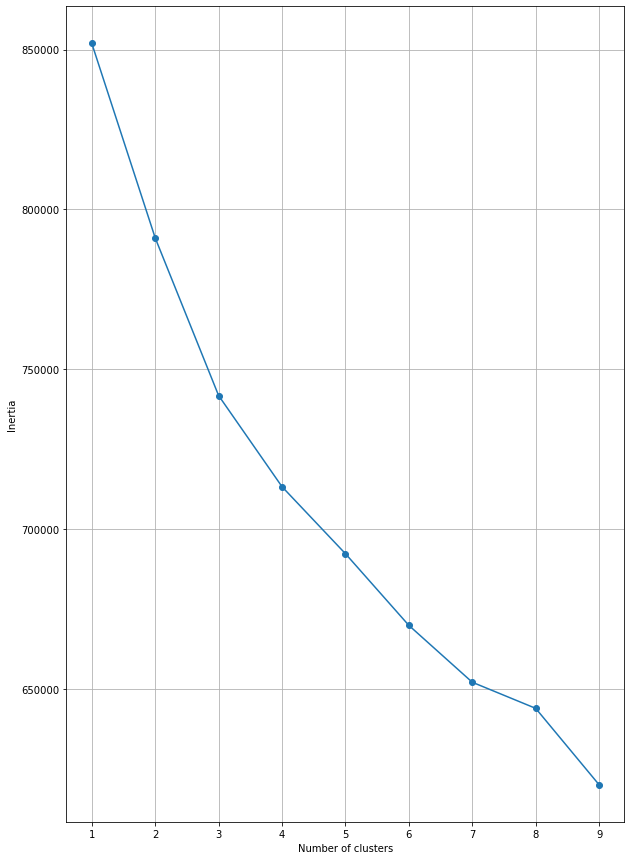

In [133]:
optimise_k_means(df6,10)

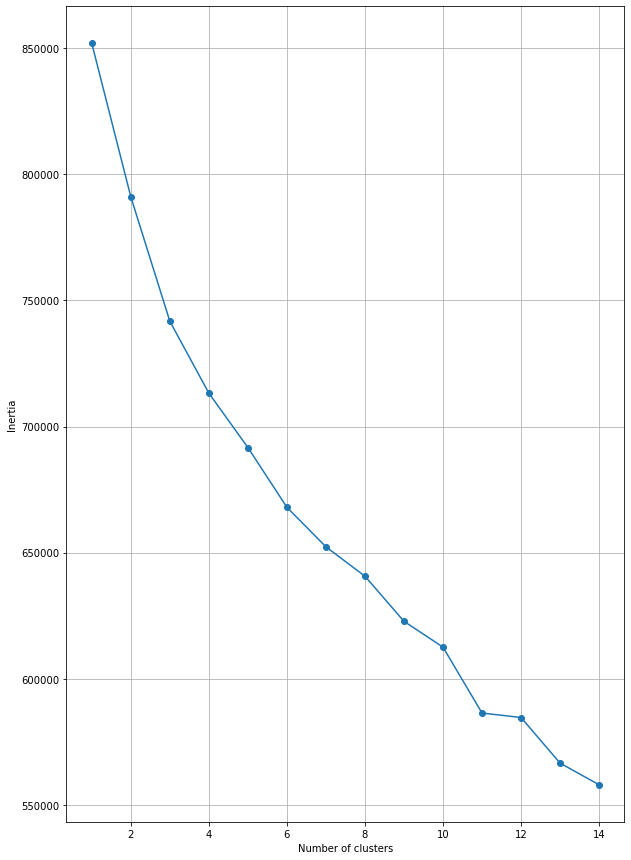

In [134]:
optimise_k_means(df6,15)

In [135]:
################### Applying k-means clustering #########################################

In [136]:
kmeans = KMeans(n_clusters = 11)

In [137]:
kmeans.fit(df6)

KMeans(n_clusters=11)

In [138]:
#Save as a column that shows each record in wich cluster it is
df6['kmeans_11'] = kmeans.labels_

In [139]:
df6

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,kmeans_11
0,-0.451668,0.000000,0.0,0.0,0.0,-0.702686,-0.233545,-0.224215,-0.044891,1.768189,1.777250,1.573397,-0.841089,0.0,1.259973e+00,-1.284224,-0.291168,-0.174999,0.438979,-1.363949,0.788158,0.871546,-1.756025,-1.242192,-0.851779,0.111446,-1.319529,-0.804241,-1.544935,0.967246,0.941648,-0.745397,-0.359378,7
1,-0.451668,-0.064722,0.0,0.0,0.0,1.100823,-0.262682,-0.224215,-0.129571,0.612407,-0.572465,1.573397,-0.841089,0.0,-1.138355e-16,0.000000,-0.291168,-0.174999,0.438979,-0.158269,-1.265175,-0.993581,-1.756025,0.994123,-0.062548,-0.560877,-1.319529,0.287373,0.717468,-1.045362,-1.045351,-0.457346,0.814760,1
2,-0.451668,0.427896,0.0,0.0,0.0,-0.147760,-0.350095,-0.224215,-0.141668,-0.438304,-0.572465,-0.646009,-0.841089,0.0,-1.138355e-16,0.000000,-0.291168,-0.174999,0.438979,0.243624,-2.145174,-0.993581,0.352467,0.994123,-1.246395,-1.105606,0.614391,0.287373,0.717468,0.022195,0.003343,-0.745397,1.114363,1
3,-0.451668,0.000000,0.0,0.0,0.0,1.100823,-0.058719,-0.224215,-0.117474,1.032692,-0.572465,1.573397,-0.841089,0.0,-1.138355e-16,0.000000,3.522389,-0.174999,0.438979,-1.363949,0.788158,0.871546,0.352467,-1.242192,1.121299,-0.673749,-1.319529,-1.531984,0.717468,0.407216,0.426500,1.098132,0.945531,7
4,2.236065,0.000000,0.0,0.0,0.0,0.407166,0.057832,-0.224215,-0.105377,0.822549,-0.572465,1.573397,-0.841089,0.0,-6.487694e-01,-1.284224,-0.291168,-0.174999,0.438979,1.449304,0.788158,0.871546,0.352467,-1.242192,1.121299,-0.683564,-1.319529,-0.804241,0.214712,-1.780402,-1.781277,1.098132,-0.935528,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28392,-0.451668,10.083192,0.0,0.0,0.0,-0.563954,-0.379233,-0.224215,-0.136830,-0.333233,-0.572465,0.000000,-0.841089,0.0,-1.138355e-16,0.000000,-0.291168,-0.174999,-2.318426,1.047410,0.788158,-0.993581,0.352467,-1.242192,-0.851779,1.249979,0.614391,0.287373,0.717468,-0.782848,-0.824573,0.522029,-0.951387,9
28393,2.236065,0.000000,0.0,0.0,0.0,1.794480,5.477438,-0.224215,-0.165863,1.873260,-0.572465,-0.646009,-0.841089,0.0,-1.138355e-16,1.373172,-0.291168,-0.174999,0.438979,1.449304,0.788158,0.871546,0.352467,0.994123,-0.062548,1.024235,-1.319529,1.015116,0.214712,0.967246,0.941648,-0.745397,0.655565,2
28394,-0.451668,1.216083,0.0,0.0,0.0,1.933212,1.281614,-0.224215,-0.165863,-0.963659,-0.572465,-0.646009,-0.841089,0.0,-1.138355e-16,0.000000,-0.291168,-0.174999,0.438979,0.243624,0.788158,-0.061017,0.352467,-1.242192,1.515915,1.249979,0.614391,2.106731,0.717468,-0.782848,-0.824573,-0.226904,1.099359,1
28395,-0.451668,0.132325,0.0,0.0,0.0,0.060337,0.232658,-0.224215,-0.044891,0.192123,1.777250,-0.646009,-0.841089,0.0,-1.481158e-01,-1.284224,-0.291168,-0.174999,0.438979,-0.158269,0.788158,-0.993581,0.352467,0.994123,-0.851779,-0.600137,0.614391,-0.804241,-2.047691,0.967246,-0.585398,-0.745397,-0.563098,5


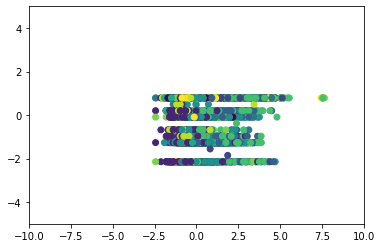

In [149]:
#Plot the results
plt.scatter(x=df6[9], y=df6[20], c=df6['kmeans_11'])
plt.xlim(-10,10)
plt.ylim(-5,5)
plt.show()

In [150]:
# Calinski-Harabasz index
ch_score_df6 = calinski_harabasz_score(df6, cluster_labels)

# Davies-Bouldin index
db_score_df6 = davies_bouldin_score(df6, cluster_labels)

print(f'Calinski-Harabasz index: {ch_score_df6}')
print(f'Davies-Bouldin index: {db_score_df6}')

Calinski-Harabasz index: 333.0492621881041
Davies-Bouldin index: 3.7177828209797807


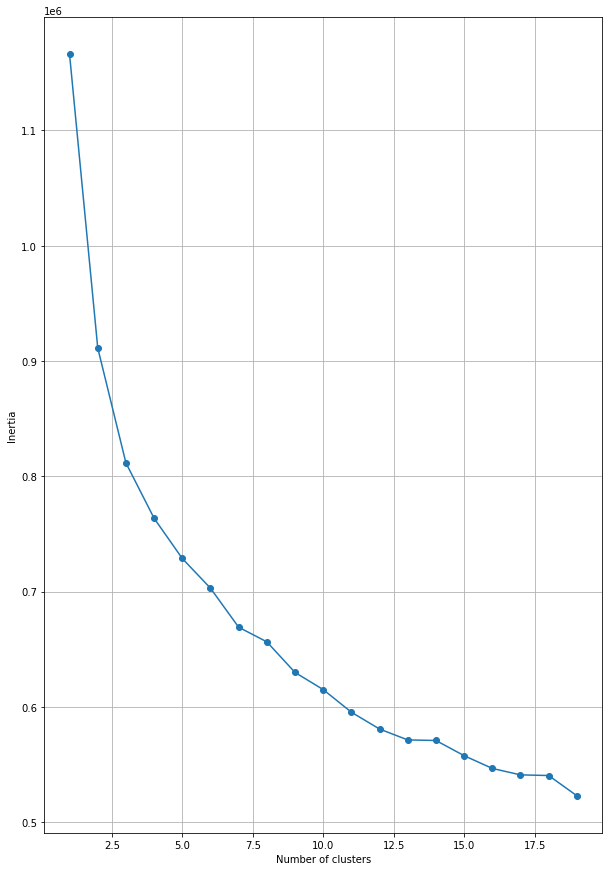

In [151]:
optimise_k_means(df6,20)

In [152]:
#Creating multiple clusters, from 12 to 16

In [154]:
for k in range(12,17):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df6)
    df6[f'kMeans_{k}'] = kmeans.labels_

In [155]:
df6

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,kmeans_11,kMeans_12,kMeans_13,kMeans_14,kMeans_15,kMeans_16
0,-0.451668,0.000000,0.0,0.0,0.0,-0.702686,-0.233545,-0.224215,-0.044891,1.768189,1.777250,1.573397,-0.841089,0.0,1.259973e+00,-1.284224,-0.291168,-0.174999,0.438979,-1.363949,0.788158,0.871546,-1.756025,-1.242192,-0.851779,0.111446,-1.319529,-0.804241,-1.544935,0.967246,0.941648,-0.745397,-0.359378,7,2,12,10,5,9
1,-0.451668,-0.064722,0.0,0.0,0.0,1.100823,-0.262682,-0.224215,-0.129571,0.612407,-0.572465,1.573397,-0.841089,0.0,-1.138355e-16,0.000000,-0.291168,-0.174999,0.438979,-0.158269,-1.265175,-0.993581,-1.756025,0.994123,-0.062548,-0.560877,-1.319529,0.287373,0.717468,-1.045362,-1.045351,-0.457346,0.814760,1,11,10,1,12,4
2,-0.451668,0.427896,0.0,0.0,0.0,-0.147760,-0.350095,-0.224215,-0.141668,-0.438304,-0.572465,-0.646009,-0.841089,0.0,-1.138355e-16,0.000000,-0.291168,-0.174999,0.438979,0.243624,-2.145174,-0.993581,0.352467,0.994123,-1.246395,-1.105606,0.614391,0.287373,0.717468,0.022195,0.003343,-0.745397,1.114363,1,11,10,1,12,4
3,-0.451668,0.000000,0.0,0.0,0.0,1.100823,-0.058719,-0.224215,-0.117474,1.032692,-0.572465,1.573397,-0.841089,0.0,-1.138355e-16,0.000000,3.522389,-0.174999,0.438979,-1.363949,0.788158,0.871546,0.352467,-1.242192,1.121299,-0.673749,-1.319529,-1.531984,0.717468,0.407216,0.426500,1.098132,0.945531,7,2,12,10,5,9
4,2.236065,0.000000,0.0,0.0,0.0,0.407166,0.057832,-0.224215,-0.105377,0.822549,-0.572465,1.573397,-0.841089,0.0,-6.487694e-01,-1.284224,-0.291168,-0.174999,0.438979,1.449304,0.788158,0.871546,0.352467,-1.242192,1.121299,-0.683564,-1.319529,-0.804241,0.214712,-1.780402,-1.781277,1.098132,-0.935528,10,1,4,2,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28392,-0.451668,10.083192,0.0,0.0,0.0,-0.563954,-0.379233,-0.224215,-0.136830,-0.333233,-0.572465,0.000000,-0.841089,0.0,-1.138355e-16,0.000000,-0.291168,-0.174999,-2.318426,1.047410,0.788158,-0.993581,0.352467,-1.242192,-0.851779,1.249979,0.614391,0.287373,0.717468,-0.782848,-0.824573,0.522029,-0.951387,9,10,9,13,11,14
28393,2.236065,0.000000,0.0,0.0,0.0,1.794480,5.477438,-0.224215,-0.165863,1.873260,-0.572465,-0.646009,-0.841089,0.0,-1.138355e-16,1.373172,-0.291168,-0.174999,0.438979,1.449304,0.788158,0.871546,0.352467,0.994123,-0.062548,1.024235,-1.319529,1.015116,0.214712,0.967246,0.941648,-0.745397,0.655565,2,9,2,9,14,11
28394,-0.451668,1.216083,0.0,0.0,0.0,1.933212,1.281614,-0.224215,-0.165863,-0.963659,-0.572465,-0.646009,-0.841089,0.0,-1.138355e-16,0.000000,-0.291168,-0.174999,0.438979,0.243624,0.788158,-0.061017,0.352467,-1.242192,1.515915,1.249979,0.614391,2.106731,0.717468,-0.782848,-0.824573,-0.226904,1.099359,1,11,10,8,2,2
28395,-0.451668,0.132325,0.0,0.0,0.0,0.060337,0.232658,-0.224215,-0.044891,0.192123,1.777250,-0.646009,-0.841089,0.0,-1.481158e-01,-1.284224,-0.291168,-0.174999,0.438979,-0.158269,0.788158,-0.993581,0.352467,0.994123,-0.851779,-0.600137,0.614391,-0.804241,-2.047691,0.967246,-0.585398,-0.745397,-0.563098,5,0,3,0,6,6


In [161]:
for k in range(12,17):
    # Calinski-Harabasz index
    ch_score_2 = calinski_harabasz_score(df6, df6[f'kMeans_{k}'])

    # Davies-Bouldin index
    db_score_2 = davies_bouldin_score(df6, df6[f'kMeans_{k}'])

    print(f'Indexes for number of clusters: {k} ')
    print(f'Calinski-Harabasz index: {ch_score_2}')
    print(f'Davies-Bouldin index: {db_score_2}')
    print('------------------------------------------')

Indexes for number of clusters: 12 
Calinski-Harabasz index: 5741.222829615821
Davies-Bouldin index: 1.152539181619748
------------------------------------------
Indexes for number of clusters: 13 
Calinski-Harabasz index: 6150.2926625600385
Davies-Bouldin index: 1.431052120449454
------------------------------------------
Indexes for number of clusters: 14 
Calinski-Harabasz index: 6378.822390294011
Davies-Bouldin index: 1.3479806168604909
------------------------------------------
Indexes for number of clusters: 15 
Calinski-Harabasz index: 6946.279584635528
Davies-Bouldin index: 0.9892327546251614
------------------------------------------
Indexes for number of clusters: 16 
Calinski-Harabasz index: 9457.379523097768
Davies-Bouldin index: 0.911467842156768
------------------------------------------


In [162]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Create a PCA model
pca = PCA(n_components=2)

Data plotttings for number of clusters: 12 


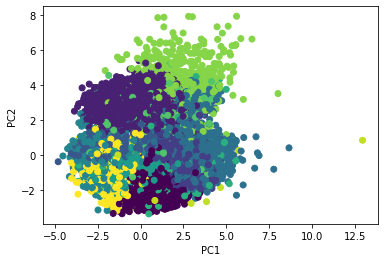

Data plotttings for number of clusters: 13 


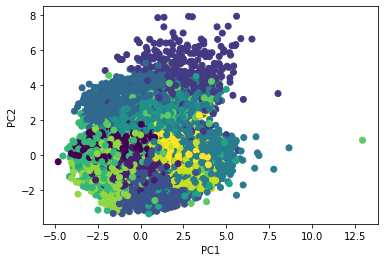

Data plotttings for number of clusters: 14 


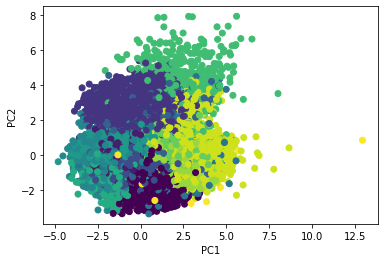

Data plotttings for number of clusters: 15 


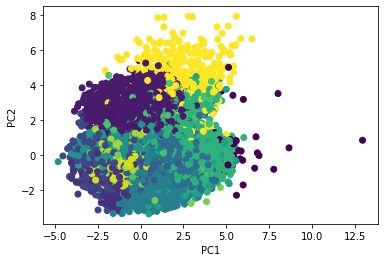

Data plotttings for number of clusters: 16 


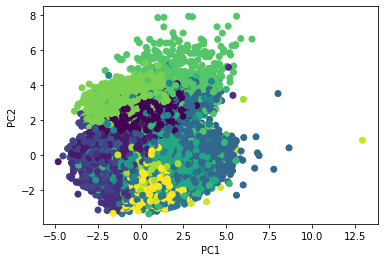

In [174]:
# Fit and transform the data to 2 dimensions
data_2d = pca.fit_transform(df6.iloc[:, 0:32])

for k in range(12,17):
    # Visualize the data using a scatter plot
    print(f'Data plotttings for number of clusters: {k} ')
    plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], c=df6[f'kMeans_{k}'])
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

Data plotttings for number of clusters: 11 


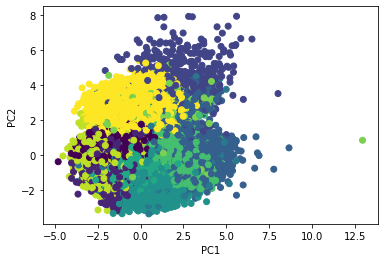

In [177]:
 print(f'Data plotttings for number of clusters: 11 ')
plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], c=df6['kmeans_11'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()